In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.head(5)

sex          age  suicides_no  population  suicides/100k pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0  Albania1987           NaN      2,156,624,900                 796   
1  Albania1987           NaN      2,156,624,900                 796   
2  Albania1987           NaN      2,156,624,900                 796   
3  Albania1987           NaN      2,156,624,900                 796   
4  Albania1987           NaN      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


Для анализа предложен датасет по статистике самоубийств. Состоит из 10 колонок, таргет - suicides/100k pop. Имеющиеся признаки:

sex                   пол

age                   возраст

suicides_no           пока непонятно, что за данные (номер?)

population            Популяция, количество людей такого возраста и пола, проживающих в конкретной стране в конкретном году

suicides/100k pop     таргет. количество самоубийств на 100т.популяции

country-year          Страна, год 

HDI for year          Индекс человеческого развития в этот год в Стране

gdp_for_year ($)     ВВП в стране в данный год

gdp_per_capita ($)    ВВП в стране в данный год на душу населения

generation            классификация поколений по возрасту

In [4]:
data.describe()

suicides_no    population  suicides/100k pop  HDI for year  \
count  27820.000000  2.782000e+04       27820.000000   8364.000000   
mean     242.574407  1.844794e+06          12.816097      0.776601   
std      902.047917  3.911779e+06          18.961511      0.093367   
min        0.000000  2.780000e+02           0.000000      0.483000   
25%        3.000000  9.749850e+04           0.920000      0.713000   
50%       25.000000  4.301500e+05           5.990000      0.779000   
75%      131.000000  1.486143e+06          16.620000      0.855000   
max    22338.000000  4.380521e+07         224.970000      0.944000   

       gdp_per_capita ($)  
count        27820.000000  
mean         16866.464414  
std          18887.576472  
min            251.000000  
25%           3447.000000  
50%           9372.000000  
75%          24874.000000  
max         126352.000000

In [5]:
data.isnull().sum()

sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas_profiling

In [8]:
data.profile_report()

In [11]:
data['HDI_for_year'].isnull().sum() / len(data)

0.699352983465133

По одному принаку HDI for year есть пропуски и их много. Незаполнено 70% значений в колонке признака. Это много. Удалять строки с отствтующими значениями, мы потеряем 70 % выборки, что недопустимо. Проанализируем какие значения заполнены. Стоит ли в принципе оставлять данную колонку, или она в связи с отсутствием такого количества данных будет для нас непрезентативна.

In [12]:
data_1 = data.dropna()
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 72 to 27819
Data columns (total 10 columns):
sex                   8364 non-null object
age                   8364 non-null object
suicides_no           8364 non-null int64
population            8364 non-null int64
suicides/100k_pop     8364 non-null float64
country-year          8364 non-null object
HDI_for_year          8364 non-null float64
_gdp_for_year_($)_    8364 non-null object
gdp_per_capita_($)    8364 non-null int64
generation            8364 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 718.8+ KB


Посмотрим, сколько стран-годов осталось в урезанном датасете и сравним с показателем полного датасета (HDI for year - это признак для страны -года)

In [13]:
len(data_1['country-year'].unique()), len(data['country-year'].unique())

(697, 2321)

Только у трети стран есть показатель HDI. Посмотрим на распределние значений 

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  36.,  108.,  288.,  756.,  960., 1416., 1332., 1308., 1332.,
         828.]),
 array([0.483 , 0.5291, 0.5752, 0.6213, 0.6674, 0.7135, 0.7596, 0.8057,
        0.8518, 0.8979, 0.944 ]),
 <a list of 10 Patch objects>)

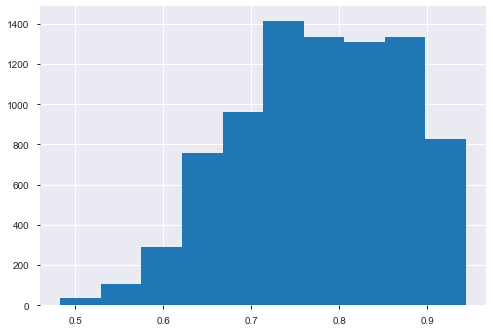

In [14]:
plt.hist(data['HDI_for_year'], 10)

Считаю, что будет некорректно подставлять в пропущенные значения статистические показатели выборки HDI (моду, медиану). Предлагаю убрать данный столбец.

Рассмортим другие признаки. Категориальные признаки age и generation дублируют друг друга. Удалим один из них - generation.

In [15]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

Признак age - категориальный. Принимает 6 значений. Создадим из него 6 признаков '15-24 years', '35-54 years', '75+ years', '25-34 years', '55-74 years', '5-14 years', которые будут принимать значение 1 или 0 в зависимости от того, к какой категории относятся данные. 

Все эти категории сбалансированы. У '5-14 years' чуть меньше данных ,но незначительно. Балансировать датасет не требуется

In [16]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

Признак sex  - категориальный. Принимает всего два значения - 'male', 'female'. Создадим из него два новых признака 'male', 'female', которые будут принимать значение 1 или 0 в зависимости от того, к какой категории относятся данные. 

Категории сбалансированы. Балансировать датасет не требуется

Признак country-year является категориальным. Количество признаков, как мы уже посчитали - 2321. Преобразовывать признак с помощью one hot encoding не имеет практического смысла (датасет из 10 признаков увеличивать в тысячи раз). К тому же есть признаки, которые описывают вещественно ситуацию в стране-году - ввп, популяция, уже разбитая на пол. Не будем использовать country-year при обучении модели.

Признак gdp_for_year приведем к числовому виду (удалим запятые)

In [18]:
data['_gdp_for_year_($)_'] = data['_gdp_for_year_($)_'].str.replace(',', '').astype(float)

In [19]:
data.head()

sex          age  suicides_no  population  suicides/100k_pop  \
0    male  15-24 years           21      312900               6.71   
1    male  35-54 years           16      308000               5.19   
2  female  15-24 years           14      289700               4.83   
3    male    75+ years            1       21800               4.59   
4    male  25-34 years            9      274300               3.28   

  country-year  HDI_for_year  _gdp_for_year_($)_  gdp_per_capita_($)  \
0  Albania1987           NaN        2.156625e+09                 796   
1  Albania1987           NaN        2.156625e+09                 796   
2  Albania1987           NaN        2.156625e+09                 796   
3  Albania1987           NaN        2.156625e+09                 796   
4  Albania1987           NaN        2.156625e+09                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

Признак suicides_no пока оставим для дальнейшего анализа.

In [20]:
len(data['suicides_no'].unique())

2084

'population' количетсво людей определенного пола в данной стране в конкретный год. Т.к. таргет уже посчитан на 100 т. популяции, сам признак популяции станвится ненужным. Удаляем

In [21]:
data.columns

Index(['sex', 'age', 'suicides_no', 'population', 'suicides/100k_pop',
       'country-year', 'HDI_for_year', '_gdp_for_year_($)_',
       'gdp_per_capita_($)', 'generation'],
      dtype='object')

Приведем датасет к нужному виду

In [53]:
t_data = data.drop(['population', 'country-year', 'HDI_for_year', 'generation'], axis=1)
t_data.head()

sex          age  suicides_no  suicides/100k_pop  _gdp_for_year_($)_  \
0    male  15-24 years           21               6.71        2.156625e+09   
1    male  35-54 years           16               5.19        2.156625e+09   
2  female  15-24 years           14               4.83        2.156625e+09   
3    male    75+ years            1               4.59        2.156625e+09   
4    male  25-34 years            9               3.28        2.156625e+09   

   gdp_per_capita_($)  
0                 796  
1                 796  
2                 796  
3                 796  
4                 796

In [24]:
sex = data['sex'].get_values().reshape(-1, 1)
sex

array([['male'],
       ['male'],
       ['female'],
       ...,
       ['male'],
       ['female'],
       ['female']], dtype=object)

In [25]:
from sklearn import preprocessing

sex_encoder = preprocessing.OneHotEncoder()
sex_encoder.fit(sex)
sex_result = sex_encoder.transform(sex).toarray()
sex_result

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [26]:
age = data['age'].get_values().reshape(-1, 1)
age

array([['15-24 years'],
       ['35-54 years'],
       ['15-24 years'],
       ...,
       ['5-14 years'],
       ['5-14 years'],
       ['55-74 years']], dtype=object)

In [27]:
age_encoder = preprocessing.OneHotEncoder()
age_encoder.fit(age)
age_result = age_encoder.transform(age).toarray()
age_result

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [28]:
sex_columns = ['sex_{}'.format(i) for i in range(sex_result.shape[1])]
age_columns = ['age_{}'.format(i) for i in range(age_result.shape[1])]

In [54]:
sex_df = pd.DataFrame(sex_result, columns=sex_columns)
sex_df.index = t_data.index
age_df = pd.DataFrame(age_result, columns=age_columns)
age_df.index = t_data.index

In [55]:
t_data_oh1 = pd.concat([t_data, sex_df], axis=1)
t_data_oh1 = t_data_oh1.drop(['sex'], axis=1)
t_data_oh = pd.concat([t_data_oh1, age_df], axis=1)
t_data_oh = t_data_oh.drop(['age'], axis=1)
t_data_oh.head()

suicides_no  suicides/100k_pop  _gdp_for_year_($)_  gdp_per_capita_($)  \
0           21               6.71        2.156625e+09                 796   
1           16               5.19        2.156625e+09                 796   
2           14               4.83        2.156625e+09                 796   
3            1               4.59        2.156625e+09                 796   
4            9               3.28        2.156625e+09                 796   

   sex_0  sex_1  age_0  age_1  age_2  age_3  age_4  age_5  
0    0.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    1.0    0.0    0.0    1.0    0.0    0.0    0.0  
2    1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0  
4    0.0    1.0    0.0    1.0    0.0    0.0    0.0    0.0

In [43]:
t_data_oh.columns

Index(['suicides_no', 'suicides/100k_pop', '_gdp_for_year_($)_',
       'gdp_per_capita_($)', 'sex_0', 'sex_1', 'age_0', 'age_1', 'age_2',
       'age_3', 'age_4', 'age_5'],
      dtype='object')

In [32]:
t_data_oh.drop_duplicates().shape

(27820, 13)

Дубликатов не обнаружено.

Посмотрим корреляцию некотегориальных признаков

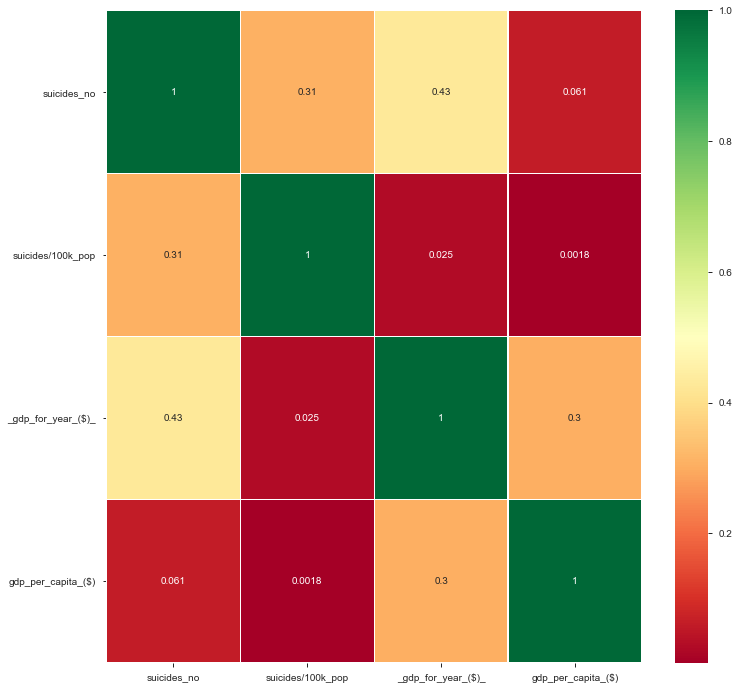

In [46]:
sns.heatmap(t_data_oh[['suicides_no', 'suicides/100k_pop', '_gdp_for_year_($)_',
       'gdp_per_capita_($)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Сильно коррелирующих между собой признаков нет. Оставляем их для обучения модели.

Проверим профайл вновь созданного датасета.

In [35]:
t_data_oh.profile_report()

Приступаем к обучению модели. Разделим выборки на тренировочную и тестовую в пропорции 70/30

In [56]:
t_data_oh.columns

Index(['suicides_no', 'suicides/100k_pop', '_gdp_for_year_($)_',
       'gdp_per_capita_($)', 'sex_0', 'sex_1', 'age_0', 'age_1', 'age_2',
       'age_3', 'age_4', 'age_5'],
      dtype='object')

In [58]:
X = t_data_oh.drop(['suicides/100k_pop'], axis=1)
y = t_data_oh['suicides/100k_pop']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.35361893350233764
RMSE: 	 15.27257995430177
MAE: 	 9.515743393759273


In [61]:
estimator.intercept_, estimator.coef_

(11.661474176863585,
 array([ 5.86645569e-03, -1.21012037e-12,  1.45043484e-05, -6.62856553e+00,
         6.62856553e+00, -3.53896088e+00, -7.89118445e-01,  5.72405401e-01,
        -1.07967600e+01,  2.76421778e+00,  1.17882162e+01]))

Очень малые веса в полученной модели имеют 'suicides_no', '_gdp_for_year_($)_', 'gdp_per_capita_($)'. Попробуем построить модель без этих признаков.

In [62]:
X_1 = t_data_oh.drop(['suicides/100k_pop', 'suicides_no', '_gdp_for_year_($)_', 'gdp_per_capita_($)'], axis=1)
y_1 = t_data_oh['suicides/100k_pop']

In [63]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=15)

estimator_1 = LinearRegression()
estimator_1.fit(X_train_1, y_train_1)

y_pred_1 = estimator_1.predict(X_test_1)

print("R2: \t", r2_score(y_test_1, y_pred_1))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test_1, y_pred_1)))
print("MAE: \t", mean_absolute_error(y_test_1, y_pred_1))

R2: 	 0.2958108506477116
RMSE: 	 15.940897102416624
MAE: 	 10.129083011790827


Первая модель немного, но лучше. Естьп редположение, чято здесь нелинейная зависимость.